<a href="https://colab.research.google.com/github/Saipranoy/Customer-churn-prediction/blob/main/Customer_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn**

The data-set contains 10,000 rows (each row contains details of a unique customer) with 15 columns: 14 features and one target feature. 

The target column:

*  *Exited* — Whether the customer churned or not.

Numeric Features:




*  *CustomerId*: A unique ID of the customer.

* *CreditScore*: The credit score of the customer,
* *Age*: The age of the customer,
* *Tenure*: The number of months the client has been with the firm.
* *Balance*: Balance remaining in the customer account,
* *NumOfProducts*: The number of products sold by the customer.
* *EstimatedSalary*: The estimated salary of the customer.

Categorical Features:

* *Surname*: The surname of the customer.
Geography: The country of the customer.
* *Gender*: M/F
* *HasCrCard*: Whether the customer has a credit card or not.
* *IsActiveMember*: Whether the customer is active or not.

# **Loading Dataset**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


# Loading and installing libraries

In [2]:
pip install ipython==7.22.0 joblib==1.0.1 lightgbm==3.3.1 matplotlib numpy pandas scikit_learn==0.24.1 seaborn xgboost==1.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 785 kB 13.2 MB/s 
     |████████████████████████████████| 303 kB 55.3 MB/s 
     |████████████████████████████████| 2.0 MB 32.6 MB/s 
     |████████████████████████████████| 22.3 MB 1.6 MB/s 
     |████████████████████████████████| 173.5 MB 11 kB/s 
     |████████████████████████████████| 1.6 MB 42.4 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
  Attempting uninstall: lightgbm
    Found existing installation: lightg

**Import libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, recall_score, confusion_matrix, classification_report 
import subprocess
import joblib
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Read the dataset**

In [4]:
import io
dc = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))

dc.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory data Analysis (EDA)

In [5]:
# Dimension of the dataset

dc.shape

(10000, 14)

In [8]:
# General statistics of data

dc.describe(exclude = ['O']) # describe all numerical columns

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
dc.describe(include=['O']) # describe all categorical columns

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Check the number of unique customers

In [11]:
print(f"There are {dc.shape[0]} rows and {dc.CustomerId.nunique()} unique customers.")

There are 10000 rows and 10000 unique customers


**Churn distribution**

In [12]:
# churn value distribution

dc["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Dataset is imbalanced with *7063* customers and *2037* churned customers.

In [15]:
# grouping by surname to see average churn value

dc.groupby(['Surname']).agg({'RowNumber':'count', 'Exited':'mean'}
                            ).reset_index().sort_values(by='RowNumber', ascending=False).head()

,Surname,RowNumber,Exited
2473,Smith,32,0.281250
1689,Martin,29,0.310345
2389,Scott,29,0.103448
2751,Walker,28,0.142857
336,Brown,26,0.192308


In [16]:
# grouping by geography
dc.groupby(['Geography']).agg({'RowNumber':'count', 'Exited':'mean'}
                                  ).reset_index().sort_values(by='RowNumber', ascending=False)

,Geography,RowNumber,Exited
0,France,5014,0.161548
1,Germany,2509,0.324432
2,Spain,2477,0.166734


We can see that customers from germany have a higher exiting rate than average.

**Univariate Plot of Numerical Variables**

Univariate means one-variable. We will try to see the distribution of the values in various numerical variables.

plotting *CreditScore* as a boxplot:

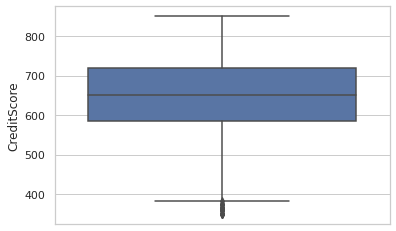

In [18]:
sns.set(style="whitegrid")
sns.boxplot(y=dc['CreditScore'])

On avearge the customers have credit score of 500 approx.

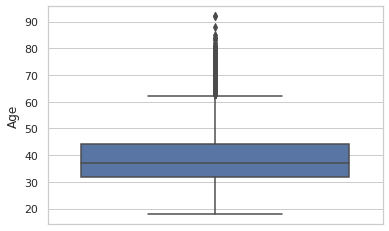

In [19]:
sns.boxplot(y=dc['Age'])

On average, the customers in the dataset are in their mid thirties i.e. around 35 years.

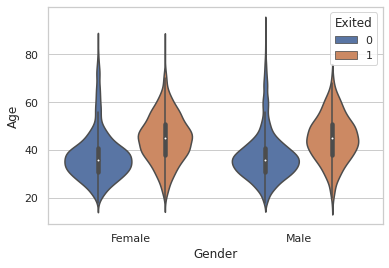

In [22]:
sns.violinplot(data=dc, x="Gender",y="Age", hue='Exited')

To read a [vilon plot](https://mode.com/blog/violin-plot-examples/), it gives the summary statistics as well as the distribution of values (kernel density).

* the center line represents the box-plot with white dot being the median

* on each side of the grey line is distribution shape of data. 
  * Wider section of the vilon plot represent a higher probability that members of the population will take
  * the thinner sections represent a lower probability